
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, f1_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, SVR

import warnings

# settings for waring
warnings.filterwarnings('ignore')


In [1]:

# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, f1_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, SVR

import warnings

# settings for waring
warnings.filterwarnings('ignore')


Loading Dataset

In [4]:
dataset = pd.read_csv('/content/wine_quality_dataset.csv')


# making dataframe
df = pd.DataFrame(dataset)

# printing dataframe
df


type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     white            7.0             0.270         0.36            20.7   
1     white            6.3             0.300         0.34             1.6   
2     white            8.1             0.280         0.40             6.9   
3     white            7.2             0.230         0.32             8.5   
4     white            7.2             0.230         0.32             8.5   
...     ...            ...               ...          ...             ...   
6492    red            6.2             0.600         0.08             2.0   
6493    red            5.9             0.550         0.10             2.2   
6494    red            6.3             0.510         0.13             2.3   
6495    red            5.9             0.645         0.12             2.0   
6496    red            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0         0.045                 45.0                 170.0  1.00100  3.00   
1         0.049                 14.0                 132.0  0.99400  3.30   
2         0.050                 30.0                  97.0  0.99510  3.26   
3         0.058                 47.0                 186.0  0.99560  3.19   
4         0.058                 47.0                 186.0  0.99560  3.19   
...         ...                  ...                   ...      ...   ...   
6492      0.090                 32.0                  44.0  0.99490  3.45   
6493      0.062                 39.0                  51.0  0.99512  3.52   
6494      0.076                 29.0                  40.0  0.99574  3.42   
6495      0.075                 32.0                  44.0  0.99547  3.57   
6496      0.067                 18.0                  42.0  0.99549  3.39   

      sulphates  alcohol  quality  
0          0.45      8.8        6  
1          0.49      9.5        6  
2          0.44     10.1        6  
3          0.40      9.9        6  
4          0.40      9.9        6  
...         ...      ...      ...  
6492       0.58     10.5        5  
6493        NaN     11.2        6  
6494       0.75     11.0        6  
6495       0.71     10.2        5  
6496       0.66     11.0        6  

[6497 rows x 13 columns]

Dataset Visualization

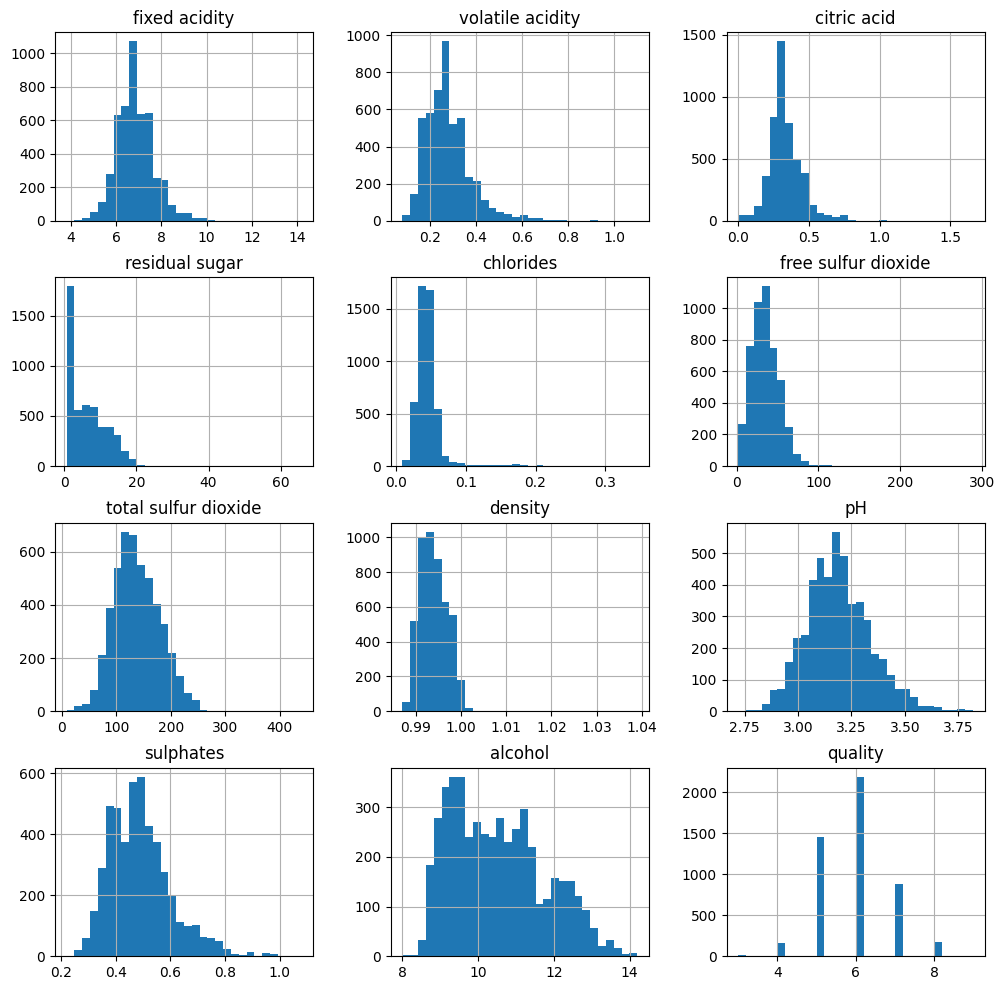

In [11]:
# showing graph for all columns data visualization
df_white.hist(bins = 30, figsize = (12, 12));

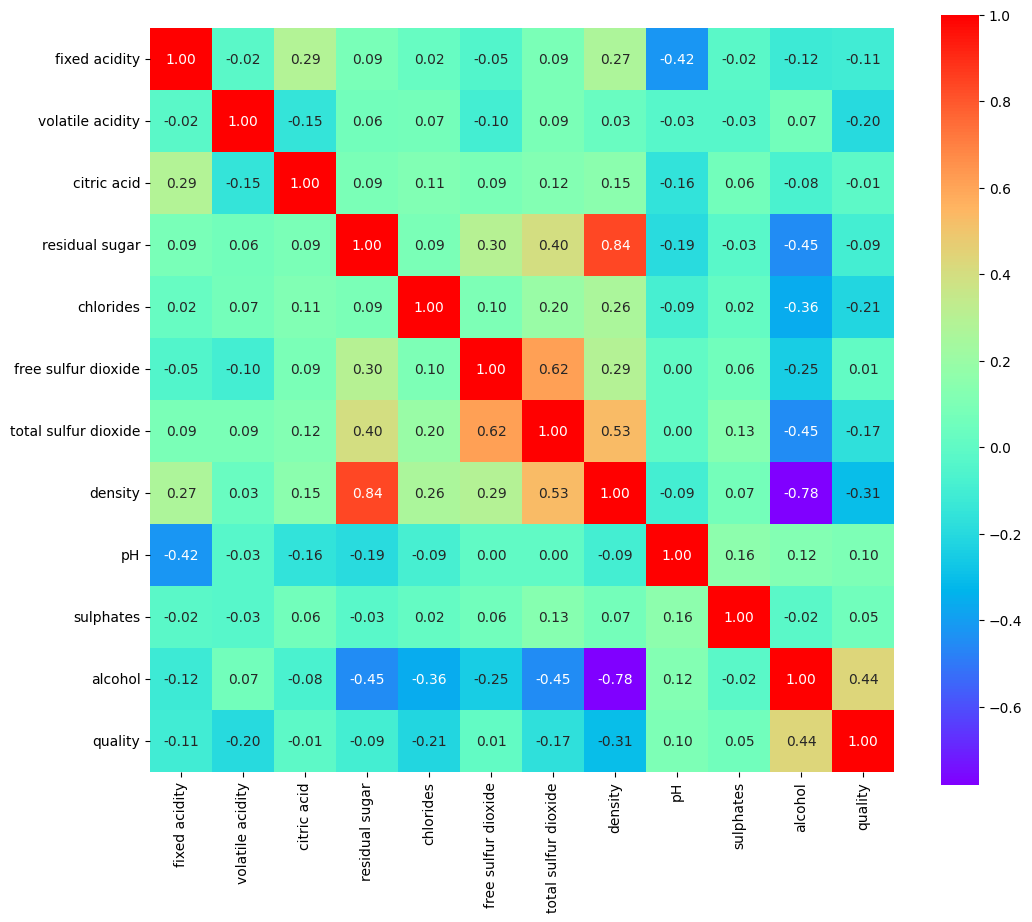

In [12]:
# setup config
plt.figure(figsize=(12, 10))

# creating heatmaps
sns.heatmap(df_white.corr(), cbar=True, square=True, fmt='.2f', annot=True, cmap='rainbow')

# displaying heatmaps
plt.show()

Cleaning & Cheacking

In [5]:
# displaying basic info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [6]:
# getting only white wines
df = df[df['type'] == 'white']

# drop column type
df = df.drop('type', axis = 1)

# copying without type column
df_white = df.copy()

# printing dataframe with only white wine
df_white

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5               NaN         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  
0         8.8        6  
1         9.5        6  
2        10.1        6  
3         9.9        6  
4         9.9        6  
...       ...      ...  
4893     11.2        6  
4894      9.6        5  
4895      9.4        6  
4896     12.8        7  
4897     11.8        6  

[4898 rows x 12 columns]

Exploratory Data Analysis(EDA)

In [7]:
# check null column
df_white.isnull().sum()

fixed acidity           8
volatile acidity        7
citric acid             2
residual sugar          2
chlorides               2
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      7
sulphates               2
alcohol                 0
quality                 0
dtype: int64

In [8]:
# to drop any rows that contain any null values
df_white.dropna(inplace=True)

# to drop the rows which all of it's values is any
# df_white.dropna(how='all', inplace=True)

# if you want to drop the columns not the rows you just set the axis to 1 like this:
# df_white.dropna(axis=1, inplace=True)

# checking if there are still any null values
df_white.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
# checking NaN and False value in dataset
df_white.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
# printing dataframe details
df_white.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4870.000000       4870.000000  4870.000000     4870.000000   
mean        6.855123          0.278071     0.334199        6.394343   
std         0.843444          0.100528     0.120915        5.070853   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4870.000000          4870.000000           4870.000000  4870.000000   
mean      0.045771            35.317146            138.340144     0.994026   
std       0.021846            17.012967             42.490515     0.002993   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991720   
50%       0.043000            34.000000            134.000000     0.993735   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  4870.000000  4870.000000  4870.000000  4870.000000  
mean      3.188154     0.489700    10.516772     5.878029  
std       0.150902     0.114196     1.231251     0.885699  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.470000    10.400000     6.000000  
75%       3.280000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000

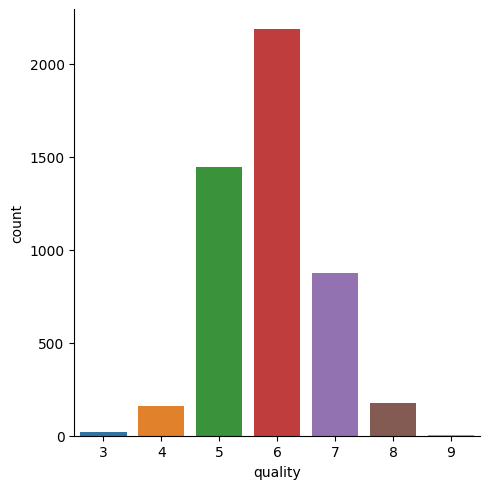

In [13]:
# chart for each value in wine quality
sns.catplot(x='quality', data=df_white, kind = 'count')

Constructing Pair Plots

In [14]:
# copy dataframe for pair plots
df_white_for_plots = df_white.copy()

# set 'quality' column to 0 for values less than or equal to 5, and set to 1 for values greater than 5
df_white_for_plots['quality'] = (df_white_for_plots['quality'] > 5).astype(int)

# priting first ten rows
df_white_for_plots.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   
5            8.1              0.28         0.40             6.9      0.050   
6            6.2              0.32         0.16             7.0      0.045   
7            7.0              0.27         0.36            20.7      0.045   
8            6.3              0.30         0.34             1.6      0.049   
9            8.1              0.22         0.43             1.5      0.044   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   
5                 30.0                  97.0   0.9951  3.26       0.44   
6                 30.0                 136.0   0.9949  3.18       0.47   
7                 45.0                 170.0   1.0010  3.00       0.45   
8                 14.0                 132.0   0.9940  3.30       0.49   
9                 28.0                 129.0   0.9938  3.22       0.45   

   alcohol  quality  
0      8.8        1  
1      9.5        1  
2     10.1        1  
3      9.9        1  
4      9.9        1  
5     10.1        1  
6      9.6        1  
7      8.8        1  
8      9.5        1  
9     11.0        1

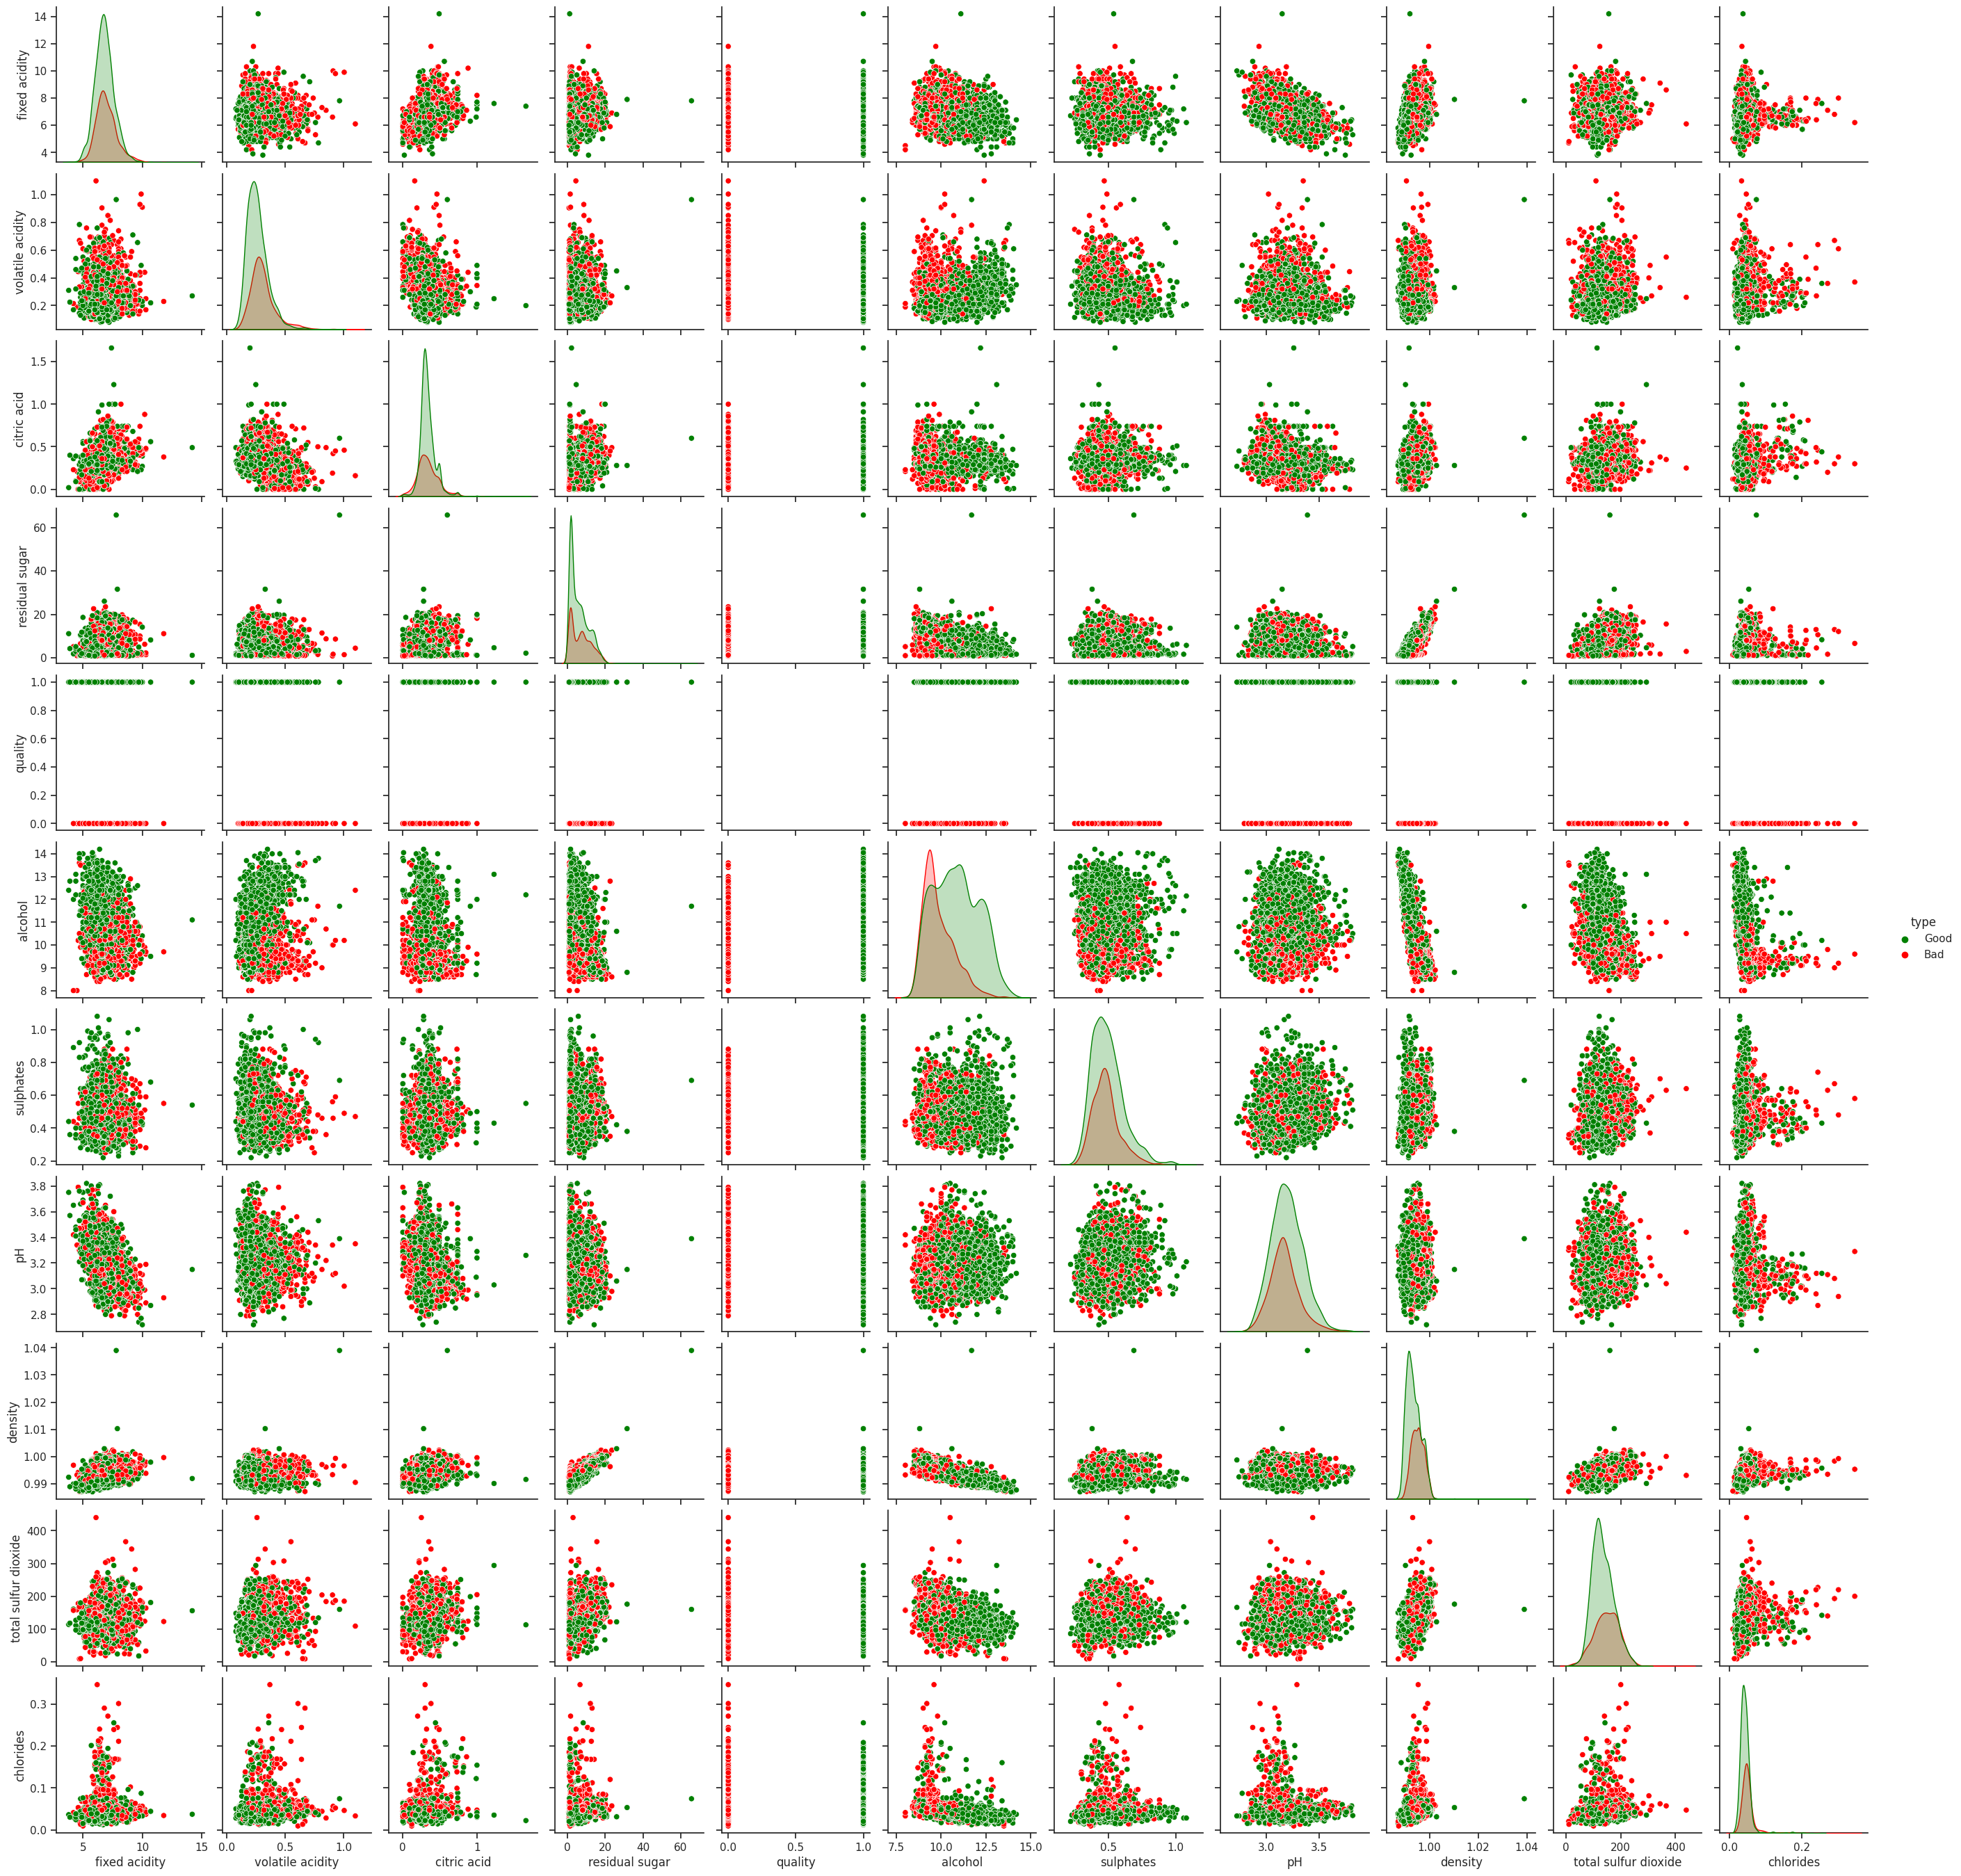

In [16]:
# create a new column 'wine_type' based on the 'quality' column
df_white_for_plots['type'] = df_white_for_plots['quality'].apply(lambda x: 'Good' if x > 0 else 'Bad')

# specify the columns for which you want to create pair plots
columns_of_interest = [
    'fixed acidity',
    'volatile acidity',
    'citric acid',
    'residual sugar',
    'quality',
    'alcohol',
    'sulphates',
    'pH',
    'density',
    'total sulfur dioxide',
    'chlorides'
]

# set the style
sns.set(style="ticks", palette="muted")

# create pair plots with different colors for different wine qualities
pair_plot = sns.pairplot(df_white_for_plots[columns_of_interest + ['type']], hue='type', palette={'Good': 'green', 'Bad': 'red'})

# show the plot
plt.show()

**Logistic Regression**<br>
Predict the Probability of Good Wine Quality

In [17]:
# copy dataframe for model
df_white_for_good_wine = df_white.copy()

# create a binary target variable 'good_wine' based on the 'quality' column
df_white_for_good_wine['good_wine'] = df_white_for_good_wine['quality'].apply(lambda x: 1 if x > 5 else 0)

# features variable
XG = df_white_for_good_wine.drop(['quality', 'good_wine'], axis=1)

# target variable
yg = df_white_for_good_wine['good_wine']

# split the data into training and testing sets
XG_train, XG_test, yg_train, yg_test = train_test_split(XG, yg, test_size=0.2, random_state=42)

# create and fit a logistic regression model
model_lr_g = LogisticRegression()
model_lr_g.fit(XG_train, yg_train)

# make predictions on the test set
y_pred_lr_g = model_lr_g.predict(XG_test)

# evaluate the model
print("Classification Report:")
print(classification_report(yg_test, y_pred_lr_g))

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.49      0.59       327
           1       0.78      0.91      0.84       647

    accuracy                           0.77       974
   macro avg       0.76      0.70      0.71       974
weighted avg       0.76      0.77      0.76       974



**Confusion Metrix**

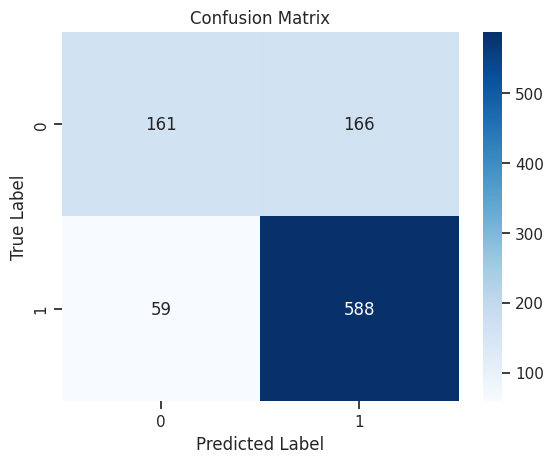

In [18]:
# visualize the confusion matrix
conf_mat = confusion_matrix(yg_test, y_pred_lr_g)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [19]:
# interpret the model coefficients
coef_df = pd.DataFrame({'Feature': XG.columns, 'Coefficient': model_lr_g.coef_[0]})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)
print("Model Coefficients:")
print(coef_df)

Model Coefficients:
                 Feature  Coefficient
9              sulphates     1.509180
10               alcohol     0.936101
2            citric acid     0.648588
3         residual sugar     0.063884
5    free sulfur dioxide     0.010669
6   total sulfur dioxide    -0.003496
0          fixed acidity    -0.361162
4              chlorides    -0.399409
8                     pH    -0.891927
7                density    -1.541849
1       volatile acidity    -5.890534


Train & test

In [21]:
# copy dataframe for model
df_white_for_model = df_white.copy()

# making quality value as 1 and 0
df_white_for_model['quality'] = (df_white_for_model['quality'] > 5).astype(int)

# features data
X = df_white_for_model.drop(columns="quality")

# test data
y = df_white_for_model["quality"]

# split the data train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# data normalization with standard scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# data normalization with min max scaler
# normalization = MinMaxScaler()
# x_train = normalization.fit_transform(X_train)
# x_test = normalization.fit_transform(X_test)

# printing divided data info
print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

# initialize variable to compare models
models_comparison = {}


X Train :  (3409, 11)
X Test  :  (1461, 11)
Y Train :  (3409,)
Y Test  :  (1461,)


Train, Build, Test with Logistic Regression

In [22]:
# creating model for logistic regression
model_lr = LogisticRegression(random_state=0)

# fitting data to model
model_lr.fit(X_train, y_train)

# predict with test data
y_pred_lr = model_lr.predict(X_test)

# find accuracies
accuracies_lr = cross_val_score(estimator=model_lr, X=X_train, y=y_train, cv=5)

# pushing model result to compare
models_comparison[f"{str(model_lr)}"] = [
    accuracy_score(y_pred_lr, y_test),
    f1_score(y_pred_lr, y_test, average="macro"),
    precision_score(y_pred_lr, y_test, average="macro"),
    recall_score(y_pred_lr, y_test, average="macro"),
    (accuracies_lr.mean()),
]

# finding accuracy_score
accuracy_score_lr = accuracy_score(y_pred_lr, y_test)

# generating confusion matrix
confusion_matrix_lr = confusion_matrix(y_test, y_pred_lr)

# true positive
TP_lr = confusion_matrix_lr[1,1]

# true negatives
TN_lr = confusion_matrix_lr[0,0]

# false positives
FP_lr = confusion_matrix_lr[0,1]

# false negatives
FN_lr = confusion_matrix_lr[1,0]

# calculating accuracy
accuracy_lr = float(TP_lr + TN_lr) / float(TP_lr + TN_lr + FP_lr + FN_lr)

# calculating sensitivity
sensitivity_lr = TP_lr / float(TP_lr + FN_lr)

# calculating specificity
specificity_lr = TN_lr / float(TN_lr + FP_lr)

# printing confusion matrix
print(confusion_matrix_lr)


[[240 227]
 [123 871]]


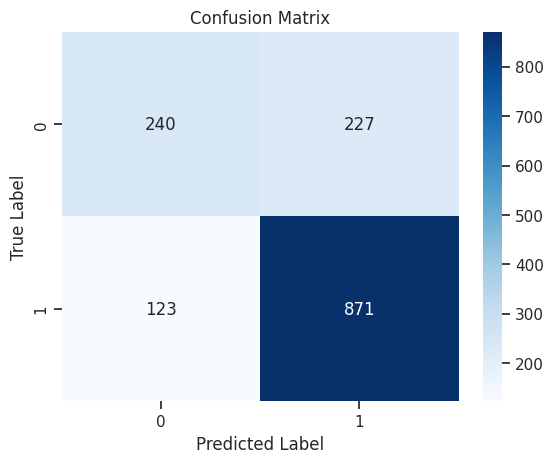

In [23]:
# confusion matrix visualization
sns.heatmap(confusion_matrix_lr, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [24]:
# printing classification report
print(classification_report(y_pred_lr, y_test))

              precision    recall  f1-score   support

           0       0.51      0.66      0.58       363
           1       0.88      0.79      0.83      1098

    accuracy                           0.76      1461
   macro avg       0.70      0.73      0.71      1461
weighted avg       0.79      0.76      0.77      1461



True Positive (Logistic Regression):  871
False Positive (Logistic Regression):  227
True Nagetive (Logistic Regression):  240
False Nagetive (Logistic Regression):  123
Accuracy (Logistic Regression):  0.7604380561259412
Accuracy (Logistic Regression):  0.7604380561259412
Sensitivity (Logistic Regression):  0.8762575452716298
Specificity (Logistic Regression):  0.5139186295503212


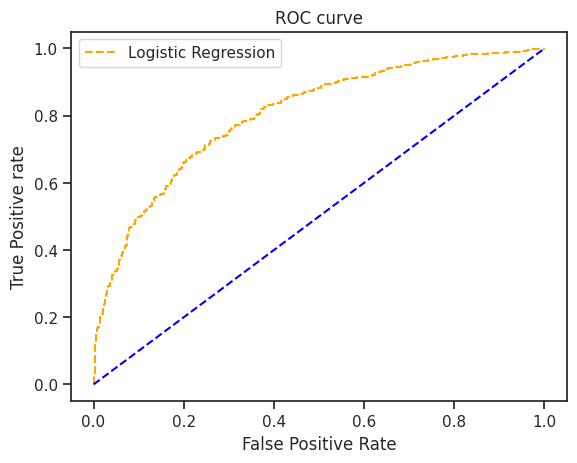

In [25]:
# displaying results
print("True Positive (Logistic Regression): ", TP_lr)
print("False Positive (Logistic Regression): ", FP_lr)
print("True Nagetive (Logistic Regression): ", TN_lr)
print("False Nagetive (Logistic Regression): ", FN_lr)
print("Accuracy (Logistic Regression): ", accuracy_score_lr)
print("Accuracy (Logistic Regression): ", accuracy_lr)
print("Sensitivity (Logistic Regression): ", sensitivity_lr)
print("Specificity (Logistic Regression): ", specificity_lr)

# predict probabilities
pred_prob_lr = model_lr.predict_proba(X_test)

# roc curve for models
fpr_lr, tpr_lr, thresh_lr = roc_curve(y_test, pred_prob_lr[:,1], pos_label=1)

# roc curve for tpr = fpr
random_probs = [0 for i in range(len(y_test))]
p_fpr_lr, p_tpr_lr, _ = roc_curve(y_test, random_probs, pos_label=1)

# plot roc curves
plt.plot(fpr_lr, tpr_lr, linestyle='--', color='orange', label='Logistic Regression')
plt.plot(p_fpr_lr, p_tpr_lr, linestyle='--', color='blue')

# roc curve labeling
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

# roc curve settings
plt.legend(loc='best')
plt.savefig('ROC', dpi=300)
plt.show();


Train, Build, Test with Decision Tree

In [26]:

# creating model for decision tree
model_dt = DecisionTreeClassifier(max_depth=50)

# fitting data to model
model_dt.fit(X_train, y_train)

# predict with test data
y_pred_dt = model_dt.predict(X_test)

# find accuracies
accuracies_dt = cross_val_score(estimator=model_dt, X=X_train, y=y_train, cv=5)

# pushing model result to compare
models_comparison[f"{str(model_dt)}"] = [
    accuracy_score(y_pred_dt, y_test),
    f1_score(y_pred_dt, y_test, average="macro"),
    precision_score(y_pred_dt, y_test, average="macro"),
    recall_score(y_pred_dt, y_test, average="macro"),
    (accuracies_dt.mean()),
]

# finding accuracy_score
accuracy_score_dt = accuracy_score(y_pred_dt, y_test)

# generating confusion matrix
confusion_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# true positive
TP_dt = confusion_matrix_dt[1,1]

# true negatives
TN_dt = confusion_matrix_dt[0,0]

# false positives
FP_dt = confusion_matrix_dt[0,1]

# false negatives
FN_dt = confusion_matrix_dt[1,0]

# calculating accuracy
accuracy_dt = float(TP_dt + TN_dt) / float(TP_dt + TN_dt + FP_dt + FN_dt)

# calculating sensitivity
sensitivity_dt = TP_dt / float(TP_dt + FN_dt)

# calculating specificity
specificity_dt = TN_dt / float(TN_dt + FP_dt)

# printing confusion matrix
print(confusion_matrix_dt)


[[324 143]
 [162 832]]


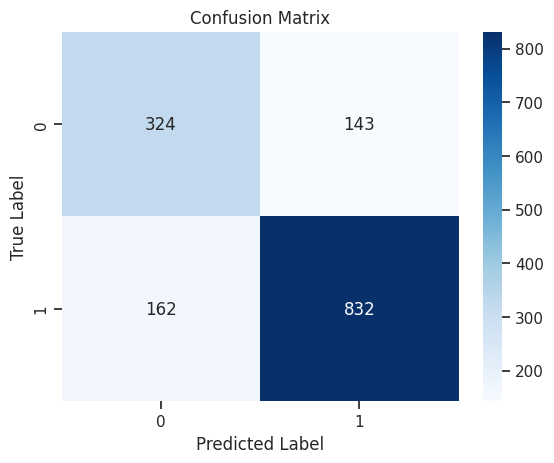

In [27]:
# confusion matrix visualization
sns.heatmap(confusion_matrix_dt, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [28]:
# printing classification report
print(classification_report(y_pred_dt, y_test))

              precision    recall  f1-score   support

           0       0.69      0.67      0.68       486
           1       0.84      0.85      0.85       975

    accuracy                           0.79      1461
   macro avg       0.77      0.76      0.76      1461
weighted avg       0.79      0.79      0.79      1461



True Positive (Decision Tree):  832
False Positive (Decision Tree):  143
True Nagetive (Decision Tree):  324
False Nagetive (Decision Tree):  162
Accuracy (Decision Tree):  0.7912388774811773
Accuracy (Decision Tree):  0.7912388774811773
Sensitivity (Decision Tree):  0.8370221327967807
Specificity (Decision Tree):  0.6937901498929336


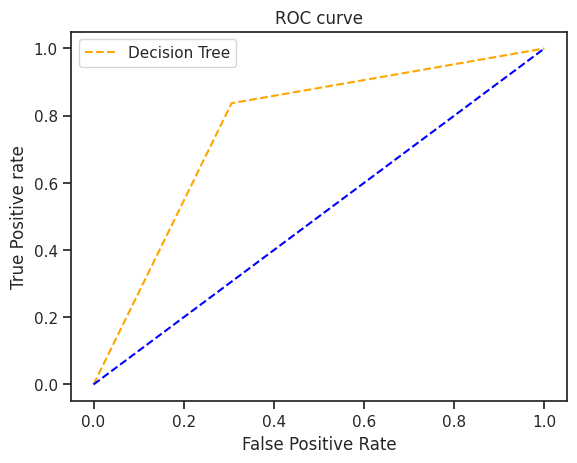

In [29]:
# displaying results
print("True Positive (Decision Tree): ", TP_dt)
print("False Positive (Decision Tree): ", FP_dt)
print("True Nagetive (Decision Tree): ", TN_dt)
print("False Nagetive (Decision Tree): ", FN_dt)
print("Accuracy (Decision Tree): ", accuracy_score_dt)
print("Accuracy (Decision Tree): ", accuracy_dt)
print("Sensitivity (Decision Tree): ", sensitivity_dt)
print("Specificity (Decision Tree): ", specificity_dt)

# predict probabilities
pred_prob_dt = model_dt.predict_proba(X_test)

# roc curve for models
fpr_dt, tpr_dt, thresh_dt = roc_curve(y_test, pred_prob_dt[:,1], pos_label=1)

# roc curve for tpr = fpr
random_probs = [0 for i in range(len(y_test))]
p_fpr_dt, p_tpr_dt, _ = roc_curve(y_test, random_probs, pos_label=1)

# plot roc curves
plt.plot(fpr_dt, tpr_dt, linestyle='--', color='orange', label='Decision Tree')
plt.plot(p_fpr_dt, p_tpr_dt, linestyle='--', color='blue')

# roc curve labeling
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

# roc curve settings
plt.legend(loc='best')
plt.savefig('ROC', dpi=300)
plt.show();


Train, Build, Test with Random Forest

In [30]:
# creating model for random forest
model_rf = RandomForestClassifier(random_state=0)

# fitting data to model
model_rf.fit(X_train, y_train)

# predict with test data
y_pred_rf = model_rf.predict(X_test)

# find accuracies
accuracies_rf = cross_val_score(estimator=model_rf, X=X_train, y=y_train, cv=5)

# pushing model result to compare
models_comparison[f"{str(model_rf)}"] = [
    accuracy_score(y_pred_rf, y_test),
    f1_score(y_pred_rf, y_test, average="macro"),
    precision_score(y_pred_rf, y_test, average="macro"),
    recall_score(y_pred_rf, y_test, average="macro"),
    (accuracies_rf.mean()),
]

# finding accuracy_score
accuracy_score_rf = accuracy_score(y_pred_rf, y_test)

# generating confusion matrix
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# true positive
TP_rf = confusion_matrix_rf[1,1]

# true negatives
TN_rf = confusion_matrix_rf[0,0]

# false positives
FP_rf = confusion_matrix_rf[0,1]

# false negatives
FN_rf = confusion_matrix_rf[1,0]

# calculating accuracy
accuracy_rf = float(TP_rf + TN_rf) / float(TP_rf + TN_rf + FP_rf + FN_rf)

# calculating sensitivity
sensitivity_rf = TP_rf / float(TP_rf + FN_rf)

# calculating specificity
specificity_rf = TN_rf / float(TN_rf + FP_rf)

# printing confusion matrix
print(confusion_matrix_rf)

[[337 130]
 [ 97 897]]


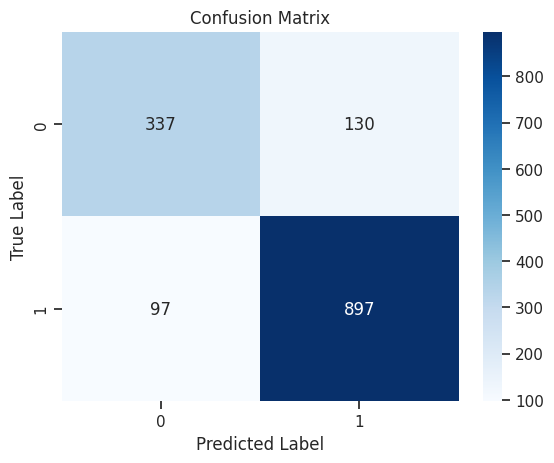

In [31]:
# confusion matrix visualization
sns.heatmap(confusion_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [32]:
# printing classification report
print(classification_report(y_pred_rf, y_test))

              precision    recall  f1-score   support

           0       0.72      0.78      0.75       434
           1       0.90      0.87      0.89      1027

    accuracy                           0.84      1461
   macro avg       0.81      0.82      0.82      1461
weighted avg       0.85      0.84      0.85      1461



True Positive (Random Forest):  897
False Positive (Random Forest):  130
True Nagetive (Random Forest):  337
False Nagetive (Random Forest):  97
Accuracy (Random Forest):  0.8446269678302533
Accuracy (Random Forest):  0.8446269678302533
Sensitivity (Random Forest):  0.9024144869215291
Specificity (Random Forest):  0.721627408993576


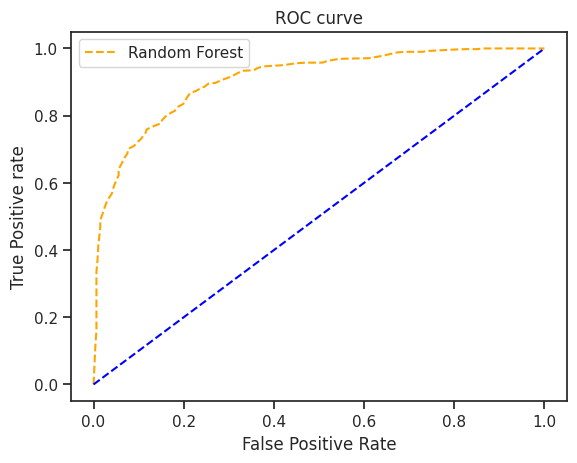

In [33]:
# displaying results
print("True Positive (Random Forest): ", TP_rf)
print("False Positive (Random Forest): ", FP_rf)
print("True Nagetive (Random Forest): ", TN_rf)
print("False Nagetive (Random Forest): ", FN_rf)
print("Accuracy (Random Forest): ", accuracy_score_rf)
print("Accuracy (Random Forest): ", accuracy_rf)
print("Sensitivity (Random Forest): ", sensitivity_rf)
print("Specificity (Random Forest): ", specificity_rf)

# predict probabilities
pred_prob_rf = model_rf.predict_proba(X_test)

# roc curve for models
fpr_rf, tpr_rf, thresh_rf = roc_curve(y_test, pred_prob_rf[:,1], pos_label=1)

# roc curve for tpr = fpr
random_probs = [0 for i in range(len(y_test))]
p_fpr_rf, p_tpr_rf, _ = roc_curve(y_test, random_probs, pos_label=1)

# plot roc curves
plt.plot(fpr_rf, tpr_rf, linestyle='--', color='orange', label='Random Forest')
plt.plot(p_fpr_rf, p_tpr_rf, linestyle='--', color='blue')

# roc curve labeling
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

# roc curve settings
plt.legend(loc='best')
plt.savefig('ROC', dpi=300)
plt.show();

Train, Build, Test with Support Vector Machine

In [34]:
# creating model for support vector machine
model_sv = SVC(random_state=0, probability=True)
# model_sv = SVC(C=50, kernel="rbf", probability=True)
# model_sv = SVR(degree=1, coef0=1, tol=0.001, C=1.5, epsilon=0.001)

# fitting data to model
model_sv.fit(X_train, y_train)

# predict with test data
y_pred_sv = model_sv.predict(X_test)

# find accuracies
accuracies_sv = cross_val_score(estimator=model_sv, X=X_train, y=y_train, cv=5)

# pushing model result to compare
models_comparison[f"{str(model_sv)}"] = [
    accuracy_score(y_pred_sv, y_test),
    f1_score(y_pred_sv, y_test, average="macro"),
    precision_score(y_pred_sv, y_test, average="macro"),
    recall_score(y_pred_sv, y_test, average="macro"),
    (accuracies_sv.mean()),
]

# finding accuracy_score
accuracy_score_sv = accuracy_score(y_pred_sv, y_test)

# generating confusion matrix
confusion_matrix_sv = confusion_matrix(y_test, y_pred_sv)

# true positive
TP_sv = confusion_matrix_sv[1,1]

# true negatives
TN_sv = confusion_matrix_sv[0,0]

# false positives
FP_sv = confusion_matrix_sv[0,1]

# false negatives
FN_sv = confusion_matrix_sv[1,0]

# calculating accuracy
accuracy_sv = float(TP_sv + TN_sv) / float(TP_sv + TN_sv + FP_sv + FN_sv)

# calculating sensitivity
sensitivity_sv = TP_sv / float(TP_sv + FN_sv)

# calculating specificity
specificity_sv = TN_sv / float(TN_sv + FP_sv)

# printing confusion matrix
print(confusion_matrix_sv)

[[282 185]
 [123 871]]


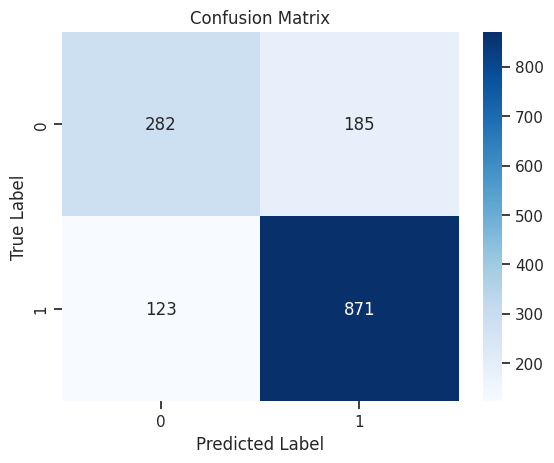

In [35]:

# confusion matrix visualization
sns.heatmap(confusion_matrix_sv, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [36]:
# printing classification report
print(classification_report(y_pred_sv, y_test))

              precision    recall  f1-score   support

           0       0.60      0.70      0.65       405
           1       0.88      0.82      0.85      1056

    accuracy                           0.79      1461
   macro avg       0.74      0.76      0.75      1461
weighted avg       0.80      0.79      0.79      1461



True Positive (Support Vector):  871
False Positive (Support Vector):  185
True Nagetive (Support Vector):  282
False Nagetive (Support Vector):  123
Accuracy (Support Vector):  0.7891854893908282
Accuracy (Support Vector):  0.7891854893908282
Sensitivity (Support Vector):  0.8762575452716298
Specificity (Support Vector):  0.6038543897216274


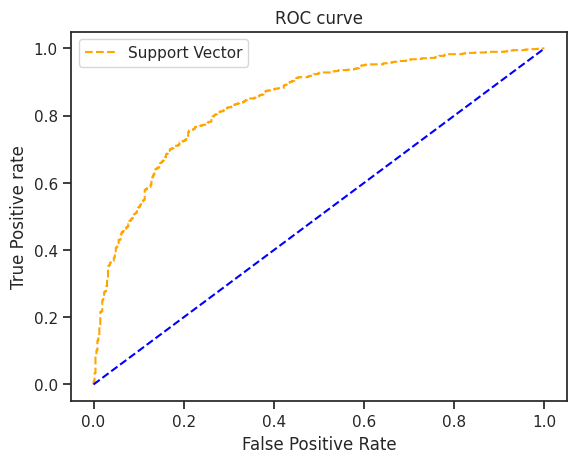

In [37]:
# displaying results
print("True Positive (Support Vector): ", TP_sv)
print("False Positive (Support Vector): ", FP_sv)
print("True Nagetive (Support Vector): ", TN_sv)
print("False Nagetive (Support Vector): ", FN_sv)
print("Accuracy (Support Vector): ", accuracy_score_sv)
print("Accuracy (Support Vector): ", accuracy_sv)
print("Sensitivity (Support Vector): ", sensitivity_sv)
print("Specificity (Support Vector): ", specificity_sv)

# predict probabilities
pred_prob_sv = model_sv.predict_proba(X_test)

# roc curve for models
fpr_sv, tpr_sv, thresh_sv = roc_curve(y_test, pred_prob_sv[:,1], pos_label=1)

# roc curve for tpr = fpr
random_probs = [0 for i in range(len(y_test))]
p_fpr_sv, p_tpr_sv, _ = roc_curve(y_test, random_probs, pos_label=1)

# plot roc curves
plt.plot(fpr_sv, tpr_sv, linestyle='--', color='orange', label='Support Vector')
plt.plot(p_fpr_sv, p_tpr_sv, linestyle='--', color='blue')

# roc curve labeling
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

# roc curve settings
plt.legend(loc='best')
plt.savefig('ROC', dpi=300)
plt.show();


**Find Best Performer Model**

In [38]:

models_df = pd.DataFrame(models_comparison).T

models_df.columns = [
    "Model Accuracy",
    "Model F1-Score",
    "Precision",
    "Recall",
    "CV Accuracy"
]

models_df = models_df.sort_values(by="Model F1-Score", ascending=False)
models_df.style.format("{:.2%}").background_gradient(cmap="Blues")